In [1]:
#!pip install networkx --user
import numpy as np
import networkx as nx
print("Networkx version: {}".format(nx.__version__))
from time import time
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()

print("numpy version: {}".format(np.__version__))
print("Networkx version: {}".format(nx.__version__))

from scipy.stats import norm
import numexpr
numexpr.print_versions()
%matplotlib inline

Networkx version: 2.4
numpy version: 1.18.1
Networkx version: 2.4
*Warning*: NumPy version is lower than recommended: 1.18.1 < 1.7.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Numexpr version:   2.6.8
NumPy version:     1.18.1
Python version:    3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
Platform:          linux-x86_64-#1 SMP Wed Oct 21 13:44:38 EDT 2020
CPU vendor:        
CPU model:         
CPU clock speed:    MHz
VML available?     True
VML/MKL version:   Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
Number of threads used by default: 8 (out of 64 detected cores)
Maximum number of threads: 64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [2]:
import tensorflow as tf
print(tf.__version__)

import os
print(os.environ['HOME'])
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

#from numba import cuda 
#device = cuda.get_current_device()
#device.reset()

2.0.0
/u/yan30
Using a GPU


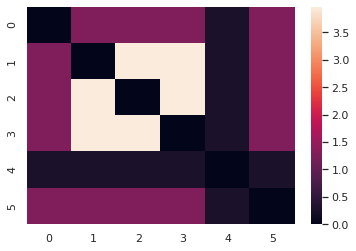

In [3]:
Gorig = nx.read_edgelist("data/resnik.txt", delimiter='\t' , nodetype=str,  data=(('weight',float),))
for u,v,d in Gorig.edges(data=True):
    Gorig[u][v]['weight']= Gorig[u][v]['weight'] + np.random.normal(0,0.001)
#H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH1', 'ALKBH2', 'ALKBH3'])
#mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH1':1, 'ALKBH2':2, 'ALKBH3':4}
H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH3'])
mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH3':4}
G0 = nx.relabel_nodes(H, mapping)
A = nx.adjacency_matrix(G0).todense()
ax = sns.heatmap(A)

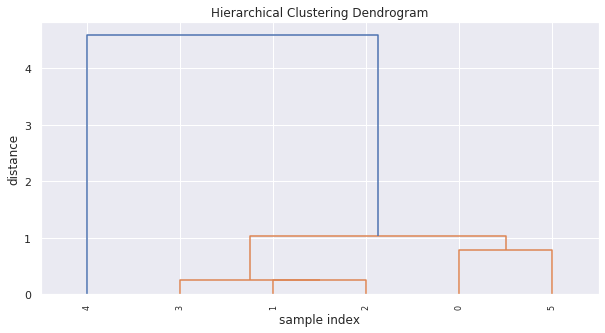

array([[1.        , 2.        , 0.2521971 , 2.        ],
       [3.        , 6.        , 0.25230492, 3.        ],
       [0.        , 5.        , 0.78151294, 2.        ],
       [7.        , 8.        , 1.02373161, 5.        ],
       [4.        , 9.        , 4.58546718, 6.        ]])

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

for u,v,d in G0.edges(data=True):
    G0[u][v]['weight']= 1.0/G0[u][v]['weight']

A = nx.adjacency_matrix(G0).todense()    
listA = squareform(A)
Z = linkage(listA, 'ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
Z

In [5]:
import networkx as nx
from networkx import relabel

Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term')
len(terms)

437

In [6]:
import pandas as pd

df = pd.read_csv('data/pearl2015.txt', sep='\t', header=None)
#df.to_csv('pdTest.csv')
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
genes

['LIG1',
 'LIG1',
 'LIG1',
 'LIG1',
 'LIG3',
 'LIG3',
 'PARP1',
 'PARP1',
 'XRCC1',
 'XRCC1',
 'XRCC1',
 'APEX1',
 'APEX2',
 'AMN1',
 'BRCC3',
 'CCNA2',
 'CCNB2',
 'CCNB3',
 'CDKN1A',
 'CDKN1A',
 'MDC1',
 'MDC1',
 'PER1',
 'PER2',
 'PER3',
 'TP53BP1',
 'TP53BP1',
 'ACTL6A',
 'ACTR5',
 'ACTR8',
 'ARID1A',
 'ARID1B',
 'ARID2',
 'BAZ1A',
 'BRD7',
 'CHRAC1',
 'INO80',
 'INO80C',
 'INO80D',
 'INO80E',
 'MCRS1',
 'NFRKB',
 'PBRM1',
 'POLE3',
 'POLE3',
 'RUVBL1',
 'RUVBL2',
 'SMARCA2',
 'SMARCA4',
 'SMARCA5',
 'SMARCB1',
 'SMARCC1',
 'SMARCC2',
 'SMARCD1',
 'SMARCE1',
 'TFPT',
 'NCAPD2',
 'NCAPD3',
 'NCAPG',
 'NCAPH',
 'NCAPH2',
 'PDS5A',
 'PDS5B',
 'RAD21',
 'SMC1A',
 'SMC1B',
 'SMC2',
 'SMC3',
 'SMC4',
 'STAG1',
 'STAG2',
 'MMS22L',
 'TONSL',
 'ALKBH2',
 'ALKBH3',
 'MGMT',
 'CRY1',
 'CRY2',
 'MBD4',
 'MPG',
 'MUTYH',
 'NEIL1',
 'NEIL2',
 'NEIL3',
 'NTHL1',
 'OGG1',
 'SMUG1',
 'TDG',
 'UNG',
 'PCNA',
 'PCNA',
 'PCNA',
 'PCNA',
 'POLD1',
 'POLD1',
 'POLD2',
 'POLD2',
 'POLD3',
 'POLD3',
 'POL

In [7]:
def get_level(level):
    for child in Gref.nodes():
        if Gref.nodes[child]['level'] == level: #get all nodes at level
            newLevel = level
            for parent in Gref.successors(child): #get parents one level above
                newLevel = level+1
                if newLevel > Gref.nodes[parent]['level']: #check if the parent's level needs to be raised
                    Gref.nodes[parent]['level'] = newLevel
    return newLevel

for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1
    print(newLevel)
        
sorted(Gref.nodes(data=True), key=lambda t: t[1].get('level', 1), reverse = True)

1
2
3
4
5
5


[('Repair pathway', {'level': 5}),
 ('Associated process', {'level': 4}),
 ('Telomere maintenance', {'level': 3}),
 ('Ubiquitin response', {'level': 3}),
 ('SSR', {'level': 3}),
 ('Alternative mechanism', {'level': 2}),
 ('Checkpoint factors', {'level': 2}),
 ('TLS', {'level': 2}),
 ('BER', {'level': 2}),
 ('Deubiquitinating enzyme (DUB)', {'level': 2}),
 ('DSR', {'level': 2}),
 ('Genes with probable DDR role', {'level': 2}),
 ('MMR', {'level': 2}),
 ('NER', {'level': 2}),
 ('Ubiquitin- activating enzymes (E1)', {'level': 2}),
 ('Ubiquitin- conjugating enzymes (E2)', {'level': 2}),
 ('Ubiquitin ligases (E3)', {'level': 2}),
 ('Ubiquitin-like proteins (UBLs)', {'level': 2}),
 ('Ubiquitins and Ubiquitin-like proteins', {'level': 2}),
 ('MRN Complex', {'level': 1}),
 ('Alt-NHEJ', {'level': 1}),
 ('AP endonucleases', {'level': 1}),
 ('Chromatin remodelling', {'level': 1}),
 ('Chromosome segregation', {'level': 1}),
 ('DNA replication', {'level': 1}),
 ('Modulation of nucleotide pools', {'l

In [309]:
tfd.Normal(loc=[2]*batchSize, scale=0.01).sample()

<tf.Tensor: id=118704, shape=(20,), dtype=float32, numpy=
array([2.000489 , 1.9932226, 1.9943951, 2.0026486, 1.9956797, 2.0189283,
       1.9946777, 2.004446 , 2.0004566, 2.0069   , 1.9849111, 1.9853485,
       2.0046005, 1.9868655, 1.9978888, 2.000657 , 1.9934024, 2.0153146,
       1.9907584, 1.9899036], dtype=float32)>

In [8]:
#Define the joint_log_prob function, and our unnormalized posterior.
def SBM_log_prob(z, batchSize, B, b0, directed=False, selfloops=False):
  # the SBM log-likelihood generative steps
    n = z.shape[0]
    #k = int(n/2)
    #pi = ed.Dirichlet(name='pi', concentration=np.ones(k), sample_shape=[n])
    #eta = tfd.Normal(loc=0, scale=0.01).sample([k,k]) #beta prior for simple edges
    #z = tf.reshape(tfd.Sample(tfd.Categorical(probs=pi),1).sample(), [n,])
    #z = tfd.Bernoulli(probs=pi).sample()
    #z0 = tf.cast(z, tf.float32)
    p = tf.matmul(tf.matmul(z,B),tf.transpose(z))
    A = tfd.Normal(loc=p+b0, scale=0.01)
    #    unsupervised tree/DAG shrinking by factors of 2, supervised grouping by suggesting mergers in a similar ratio 
    #    use tfd.MixtureSameFamily to automatically integrate out the z draws. Construct the mixture dist from pair-wise counting of z draws
    #    p = eta[(z.reshape((n, 1)), z.reshape((1, n)))][triu_indices] #replace with equation 5.5 for analytical posterior, including DC?
    #if weighted:
    #    A = ed.Poisson(name = 'A', mu=p, shape=A_obs[0].shape, observed=A_obs) #collect edge/non-edge statistics for the analytical posterior
    #else:
    return A

In [547]:
class VariationalEstep0(tf.keras.Model):
#Optimizes pi and z with fixed phi, B, B0, (a, b are ommitted at the moment)

    def __init__(self, k, name=None):
        super(VariationalEstep, self).__init__(name=name)
        self.w_loc = tf.Variable(tf.random.normal([k, k]), name='w_loc')
        self.w_std = tf.Variable(tf.random.normal([k, k]), name='w_std')
        self.b_loc = tf.Variable(tf.random.normal([1]), name='b_loc')
        self.b_std = tf.Variable(tf.random.normal([1]), name='b_std')
    
    @property
    def weight(self):
        """Variational posterior for the weight"""
        return tfd.Normal(self.w_loc, tf.exp(self.w_std))
    
    @property
    def bias(self):
        """Variational posterior for the bias"""
        return tfd.Normal(self.b_loc, tf.exp(self.b_std))
    
    # for guided z and pi evaluation
    def call(self, z, n, batchSize):
        """Predict p(y|x)"""
        #sample = lambda x: x.sample() if sampling else x.mean()
        return SBM_log_prob(z, batchSize, self.weight.sample(), self.bias.sample(n))
    
    def KLlosses(self, GrefBlkVars, B0):
        prior = tfd.Normal(GrefBlkVars, tf.exp(self.w_std))
        prior2 = tfd.Normal(B0, tf.exp(self.b_std))
        return tf.reduce_sum(tfd.kl_divergence(self.weight, prior)+tfd.kl_divergence(self.bias, prior2))

In [549]:
# Function to compute the log posterior probability
import cProfile 
import itertools as it

#def f():
Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
k = len(Gnew)
label = np.zeros(k)
label[1]=0
label[2]=2
label[3]=0
label[4]=1
label[5]=1
#label[k-1]=4
knew = int(max(label)+1)

pi0 = ed.Beta(name='test', concentration1=0.5, concentration0=0.5, sample_shape=[len(Gnew),knew])
labelOneHot = tf.one_hot(label.astype(int), knew, dtype = "float32")
ppi = ((labelOneHot*9 + pi0)/10)
print(ppi)
pz = tf.cast(ed.Bernoulli(probs=ppi, name="z"), dtype=tf.float32)
# set initial state (drawn from prior built from OG subgraphs)
#
#
# Prior design will be key here, needs external input
model = VariationalEstep(knew)
L_RATE = 0.005
batchSize = 20
optimizer = tf.keras.optimizers.Adam(lr=L_RATE)
Y = tf.cast(tf.stack([nx.to_numpy_array(Gnew)]*400), dtype=tf.float32)
data_train = tf.data.Dataset.from_tensor_slices(Y).batch(batchSize).shuffle(500)

totalW = sum(sum(nx.to_numpy_array(Gnew)))
GrefBlkVars = np.random.normal(loc = totalW/len(Gnew)/(len(Gnew)-1)*2, scale = 1, size = (knew,knew))
for i in range(knew):
    for j in range(knew): 
        if (j==i): # only update diagonal entries for efficiency
            id1, id2 = zip(*it.product(np.where(label==i)[0],np.where(label==j)[0])) #cartesian product of the i j blocks
            totalW = sum(nx.to_numpy_array(Gnew)[id1, id2]) #total edge weights of the block pair
            GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)
    
historyB=[]
historyb=[]

def E_step(y):
    with tf.GradientTape() as tape:
        log_prob = tf.reduce_mean(model(pz,n,batchSize).log_prob(y)) #test the target_log_prob_fn with initial state
        print(log_prob)
        kl_loss = model.KLlosses(GrefBlkVars,2)/n*10
        elbo_loss = kl_loss - log_prob
    gradients = tape.gradient(elbo_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return model.weight, model.bias
for (y_data) in data_train:
    B, b = E_step(y_data)
    historyB.append(B)
    historyb.append(b)

tf.Tensor(
[[9.8675805e-01 1.9171814e-02 5.4212522e-02]
 [5.8808187e-03 9.5641786e-01 9.5432298e-03]
 [9.1713858e-01 1.3138069e-02 3.6926992e-02]
 [9.7491950e-01 3.9131674e-03 3.0671707e-03]
 [7.7913545e-02 1.3024898e-04 9.0009689e-01]
 [4.6247739e-02 9.0092629e-01 6.2676437e-02]], shape=(6, 3), dtype=float32)
tf.Tensor(-31808.875, shape=(), dtype=float32)
tf.Tensor(-42068.332, shape=(), dtype=float32)
tf.Tensor(-53743.266, shape=(), dtype=float32)
tf.Tensor(-31785.66, shape=(), dtype=float32)
tf.Tensor(-25958.465, shape=(), dtype=float32)
tf.Tensor(-28323.248, shape=(), dtype=float32)
tf.Tensor(-27305.566, shape=(), dtype=float32)
tf.Tensor(-30179.045, shape=(), dtype=float32)
tf.Tensor(-35437.105, shape=(), dtype=float32)
tf.Tensor(-31373.94, shape=(), dtype=float32)
tf.Tensor(-28518.363, shape=(), dtype=float32)
tf.Tensor(-29295.117, shape=(), dtype=float32)
tf.Tensor(-57396.844, shape=(), dtype=float32)
tf.Tensor(-29081.545, shape=(), dtype=float32)
tf.Tensor(-21786.648, shape=(), 

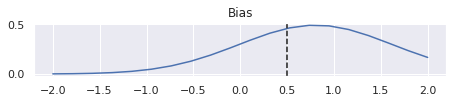

In [423]:
fig = plt.figure()
fig.set_size_inches(6.4, 8)
v = np.linspace(-2, 2, 20)

# Plot weight posteriors
#probs = model.weight.prob(v*np.ones([k, 1]))
#for i in range(k):
    #plt.subplot(k+1, 1, i+1)
    #plt.plot(v, probs[i, :])
    #plt.axvline(x=w_true[i], linestyle='--', color='k')
    #plt.title('W[{}]'.format(i))
    
# Plot Bias posterior
plt.subplot(k+1, 1, k+1)
plt.plot(v, model.bias.prob(v))
plt.axvline(x=0.5, linestyle='--', color='k')
plt.title('Bias')

plt.tight_layout()
plt.show()

In [218]:
class VariationalEstep(tf.keras.Model):
#Optimizes pi and z with fixed phi, B, B0, (a, b are ommitted at the moment)

    def __init__(self, k, n, phi, name=None):
        super(VariationalEstep, self).__init__(name=name)
        self.pi = tf.Variable(tfd.Beta(concentration1=1, concentration0=1).sample([k]), name="pi",constraint=lambda x: tf.clip_by_value(x, 0, 1))
        self.phi = tf.Variable(phi, name="phi",constraint=lambda x: tf.clip_by_value(x, 0, 1))
        self.z = tf.Variable(tfd.RelaxedBernoulli(0.000001, probs=self.phi, validate_args=True, allow_nan_stats=False).sample(n), name="z",constraint=lambda x: tf.clip_by_value(x, 0, 1))
        #self.pi = tf.Variable(tfd.Beta(concentration1=1, concentration0=1).sample([k]), name="pi")
        #self.phi = tf.Variable(phi, name="phi")
        #self.z = tf.Variable(tfd.RelaxedBernoulli(0.000001, probs=self.phi, validate_args=True, allow_nan_stats=False).sample(n), name="z")
        #self.b0 = tf.Variable(tf.exp(tf.random.normal([1])), name='b0')
        #self.s_alpha = tf.Variable(tf.exp(tf.random.normal([1])), name='s_alpha')
        #self.s_beta = tf.Variable(tf.exp(tf.random.normal([1])), name='s_beta')
    
    #@property
    #def ppi(self):
    #    """Variational posterior for the Beta distribution"""
    #    return tfd.Beta(concentration1=self.s_alpha, concentration0=self.s_beta)
    
    @property
    def pz(self):
        """Variational posterior for the bias parameter"""
        #ppi2 = tfd.Beta(concentration1=self.s_a, concentration0=self.s_b)
        return tfd.Bernoulli(probs=self.pi)
    
    # for free z and pi learning    
    def call(self, GrefBlkVars, B0, k, n):
        """Predict p(y|x)"""
        #sample = lambda x: x.sample() if sampling else x.mean()
        return SBM_log_prob(self.z, k, GrefBlkVars, B0)
    
    def KLlosses(self,priorZ):
        """Sum of KL divergences between posteriors and priors"""
        prior = tfd.Bernoulli(probs=self.phi)
        # L-2 norm for sparsity + KL #consistency of the continous approximation
        return tf.reduce_sum(tf.square(self.pi))*10+tf.reduce_sum(tfd.kl_divergence(self.pz, prior))\
        +tf.reduce_sum(tf.abs(self.z-tf.cast(self.pz.sample(self.z.shape[0]), tf.float32)))*10\
        +tf.reduce_sum(tf.abs(self.z-priorZ))#incorporating prior for z
        
    def mUpdate(self, phiNew):
        """Sum of KL divergences between posteriors and priors"""
        self.phi = self.phi.assign(phiNew)

In [53]:
#import tensorflow.keras.backend as kerasB
Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
k = len(Gnew)
label = np.zeros(k)
label[1]=0
label[2]=2
label[3]=0
label[4]=1
label[5]=1
#label[k-1]=4
knew = int(max(label)+1)

# Prior design will be key here, needs external input
L_RATE = 0.005
batchSize = 20
n = len(Gnew)
optimizer = tf.keras.optimizers.Adam(lr=L_RATE)
Y = tf.cast(tf.stack([nx.to_numpy_array(Gnew)]*400), dtype=tf.float32)
data_train = tf.data.Dataset.from_tensor_slices(Y).batch(batchSize).shuffle(500)

#@tf.function
def E_step(y,GrefBlkVars,z):
    with tf.GradientTape() as tape:
        log_prob = tf.reduce_mean(model(GrefBlkVars,0.0,knew,n).log_prob(y))
        kl_loss = model.KLlosses(z)/n*100
        elbo_loss = kl_loss - log_prob
    gradients = tape.gradient(elbo_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return model

def M_step(z):
    with tf.GradientTape() as tape:
        #log_prob = tf.reduce_mean(model(GrefBlkVars,2.0,k2,n).log_prob(y))
        phi2 = tf.reduce_sum(z, 0)/n
        model.mUpdate(phi2)
    return GrefBlkVars

In [140]:
labelnew = np.where(labelOneHot>0.5,1,0)
labelnew[0,2] = 4
labelnew

array([[1, 0, 4],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [189]:
labelnew[np.arange(mask.shape[0])[:,None],mask]

array([[0, 1, 4],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [191]:
mask = np.partition(labelnew,range(3))
mask

array([[0, 1, 4],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [91]:
for i in range(knew):
    if len(np.where(labelnew[:,i]==1)[0])>0:
        for j in range(knew): 
            if (j==i) & len(np.where(labelnew[:,j]==1)[0])>0 : # only update diagonal entries for efficiency
                id1, id2 = zip(*it.product(np.where(labelnew[:,i]==1)[0],np.where(labelnew[:,j]==1)[0])) #cartesian product of the i j blocks
                totalW = sum(nx.to_numpy_array(Gref)[id1, id2]) #total edge weights of the block pair
                GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)

In [68]:
# Function to compute the log posterior probability
import cProfile 
import itertools as it

phi = np.asarray([0.6,0.3,0.1]).astype("float32")
model = VariationalEstep(knew,len(Gnew),phi)
labelOneHot = tf.one_hot(label.astype(int), knew, dtype = "float32")
pz = tf.cast(ed.Bernoulli(probs=labelOneHot, name="z"), dtype=tf.float32)

totalW = sum(sum(nx.to_numpy_array(Gnew)))
GrefBlkVars = np.random.normal(loc = totalW/len(Gnew)/(len(Gnew)-1)*2, scale = 1, size = (knew,knew))
for i in range(knew):
    for j in range(knew): 
        if (j==i): # only update diagonal entries for efficiency
            id1, id2 = zip(*it.product(np.where(labelnew[:,i]==1)[0],np.where(labelnew[:,j]==1)[0])) #cartesian product of the i j blocks
            totalW = sum(nx.to_numpy_array(Gnew)[id1, id2]) #total edge weights of the block pair
            GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)

historyPi=[]
historyZ=[]
for (y_data) in data_train:
    posterior = E_step(y_data,GrefBlkVars,pz)
    #updates hyper parameters
    pi = posterior.pi.numpy()
    z = posterior.z.numpy()
    M_step(z)
    print(pi)
    historyPi.append(pi)
    historyZ.append(z)

[0.8100026  0.00689591 0.6247591 ]
[0.8050108  0.01187984 0.6200165 ]
[0.80000407 0.01682697 0.6151565 ]
[0.79499197 0.02173251 0.61025155]
[0.7899808  0.02659449 0.60533315]
[0.7849752  0.03141168 0.6004174 ]
[0.7799784  0.03618333 0.59551257]
[0.7749933  0.04090886 0.59062314]
[0.7700222  0.04558779 0.5857502 ]
[0.76506734 0.05021972 0.58089477]
[0.76013035 0.05480425 0.576058  ]
[0.75521284 0.05934134 0.57124007]
[0.7503165  0.06383102 0.56644094]
[0.74544275 0.06827328 0.56166023]
[0.74059296 0.07266814 0.55689806]
[0.7357683  0.07701562 0.5521549 ]
[0.73097014 0.08131578 0.5474315 ]
[0.7261996 0.0855687 0.5427287]
[0.7214578  0.08977446 0.5380467 ]
[0.7167457  0.09393319 0.5333848 ]


In [134]:
#import pandas as pd
#pd.DataFrame(ppi.numpy())
model.trainable_variables

[<tf.Variable 'pi:0' shape=(3,) dtype=float32, numpy=array([0.13703088, 0.31678057, 0.27454117], dtype=float32)>,
 <tf.Variable 'z:0' shape=(6, 3) dtype=float32, numpy=
 array([[0.87037754, 0.        , 0.8704288 ],
        [0.8752207 , 0.        , 0.        ],
        [0.8696999 , 0.        , 0.        ],
        [0.8705464 , 0.87069625, 0.        ],
        [0.        , 0.8710181 , 0.        ],
        [0.09906675, 0.09320183, 0.10191891]], dtype=float32)>]

In [10]:
# Merge quasi-cliques with more than 3 overlapping nodes
def merge_cliques(Clist):
    for i in range(0, len(Clist)):
        c1 = Clist[i]
        for j in range(i+1, len(Clist)):
            c2 = Clist[j]
            if (len(c1.intersection(c2))>1): # define quasi-cliques with number of overlapping nodes
                c3 = c1.union(c2)
                Clist.insert(0,c3)
                Clist.remove(c1)
                Clist.remove(c2)
                return merge_cliques(Clist)
    return Clist

In [11]:
import networkx.algorithms.clique as clique
import itertools as it
import random 

def getCandidatesB(G, Gref, labels):
    parentList = []
    for source, target in Gref.edges():
        if len(Gref.in_edges(source, data=True)) == 0: #leaf nodes (genes)
            tup = (target,Gref.nodes[target]['level'])
            parentList.append(tup)
    #random.shuffle(parentList)
    tmp = sorted(parentList, key=lambda t: t[1]) #sort leaves by level
    parentSet = list(set(parentList))

    merges = []
    for parent in parentSet[:5]:
        c = []
        for predecessor in Gref.predecessors(parent[0]): #only include leaves
            if len(Gref.in_edges(predecessor, data=True)) == 0:
                c.append(predecessor)
        merges.append(set(c))
    print(merges)
    
    CliXO = {}    
    nodeSet = sorted(set().union(*merges))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(merges): 
            if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    combinations = it.product(*(CliXO[Name] for Name in nodeSet))    
    Llist = []
    for update in combinations:
        labelsNew = labels.copy()
        for idx, x in enumerate(update):        
            nodeIDs = [x for x,y in G.nodes(data=True) if y['term']==nodeSet[idx]]
            if nodeIDs!=[]:
                labelsNew[nodeIDs[0]] = len(labels)+x #assign brand new block labels
        b,c =np.unique(labelsNew, return_inverse=True)
        Llist.append(c)
    return Llist

In [500]:
label1hot.shape

(437, 379)

In [12]:
import networkx.algorithms.clique as clique
import itertools as it

def getCandidates(G, top, maxC, maxP):
    edgesTop=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)
    #percent = int(len(edgesTop)/5000) # adjust for layer size
    eList = [(x[0],x[1]) for x in edgesTop[:top]]
    sub = G.edge_subgraph(eList)
    graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
    #print(len(graphs))
    max_clique_sets = [clique.find_cliques(s) for s in graphs]
    cliques = []
    for clist in max_clique_sets:
        tmp = []
        for c in clist:
            if ((len(c)>=2) & (len(c)<=maxC)): #control size of cliques
                cohesion = 0
                for idx, x in enumerate(c):
                    for idy, y in enumerate(c):
                        if (idy>idx):
                            cohesion = cohesion + G[x][y]['weight']
                tup = (set(c),cohesion/(len(c)-1)) #higher order cliques prioritized
                tmp.append(tup)
        tmp = sorted(tmp, key=lambda t: t[1], reverse=True) #sort cliques
        cliques += tmp[:5] #keep only top 3 cliques for each component
    
    CliList = sorted(cliques, key=lambda t: t[1], reverse=True)
    #print(CliList)
    cliquesFiltered0 = [x[0] for x in CliList]
    cliquesFiltered = merge_cliques(cliquesFiltered0)

    CliXO = {}    
    nodeSet = sorted(set().union(*cliquesFiltered))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(cliquesFiltered): 
            if (x in y) and len(CliXO[x])<maxP: #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    k = len(G) #original block number = graph size
    labels = np.arange(k)
    maxLabel = len(cliquesFiltered)
    knew = k-maxLabel #new block number after mergers
    label1hot = np.zeros([k,knew])
    labelCount = 0
    for idx, row in enumerate(label1hot):
        if (idx in CliXO): #node to be merged according to CliXO
            label1hot[idx,CliXO[idx]] = 1.0
        else:
            label1hot[idx,maxLabel+labelCount] = 1.0
            labelCount = labelCount+1
    return label1hot

In [219]:
def buildLayer(GnewL, Gref, Llist):
    batchSize = 10
    Y = tf.cast(tf.stack([nx.to_numpy_array(GnewL)]*100), dtype=tf.float32)
    data_train = tf.data.Dataset.from_tensor_slices(Y).batch(batchSize).shuffle(500)
    n = len(GnewL)
    
    Mlist = []
    labelOneHot = Llist[0]
    knew = labelOneHot.shape[1]
    ppz = ed.Bernoulli(probs=labelOneHot, name="z").numpy().astype("float32")
    phi = tf.reduce_sum(ppz, 0)/n
    print(knew)
    # set initial state (drawn from prior built from OG subgraphs)
    # Prior strength tuning parameter
    # Prior design will be key here, needs external input from corresponding OG layer
    modelInner = VariationalEstep(knew,n,phi)
    totalW = sum(sum(nx.to_numpy_array(Gref)))
    GrefBlkVars = np.random.normal(loc = totalW/len(Gref)/(len(Gref)-1)*2, scale = 1, size = (knew,knew))
    labelnew = np.where(labelOneHot>0.5,1,0)
    for i in range(knew):
        if len(np.where(labelnew[:,i]==1)[0])>0:
            for j in range(knew): 
                if (j==i) & len(np.where(labelnew[:,j]==1)[0])>0 : # only update diagonal entries for efficiency
                    id1, id2 = zip(*it.product(np.where(labelnew[:,i]==1)[0],np.where(labelnew[:,j]==1)[0])) #cartesian product of the i j blocks
                    totalW = sum(nx.to_numpy_array(Gref)[id1, id2]) #total edge weights of the block pair
                    GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
    GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)

    for (y_data) in data_train:
        with tf.GradientTape() as tape:
            log_prob = tf.reduce_mean(modelInner(GrefBlkVars,0.0,knew,n).log_prob(y_data))
            kl_loss = modelInner.KLlosses(ppz)/n*100
            elbo_loss = kl_loss - log_prob
        gradients = tape.gradient(elbo_loss, modelInner.trainable_variables)
        optimizer.apply_gradients(zip(gradients, modelInner.trainable_variables))
        phi2 = tf.reduce_sum(modelInner.z, 0)/n
        modelInner.mUpdate(phi2)
    return (log_prob,modelInner) #higher order cliques prioritized

In [14]:
def updateDAG(G, NodeMerge, terms):
    size = len(NodeMerge);
    nodeSet = sorted(set().union(*NodeMerge))
    A = nx.adjacency_matrix(G).todense()
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        newNodeV = np.sum(A[nodes,:],axis=0)/len(nodes)
        B = np.vstack([A, newNodeV])
        newNodeC = np.sum(B[:,nodes],axis=1)/len(nodes)
        A = np.column_stack([B, newNodeC])
        
    #print(nodeSet)
    A = np.delete(A, nodeSet, axis = 0)
    #print(A.shape)
    A = np.delete(A, nodeSet, axis = 1)
    dt=[('weight',float)]
    A = np.matrix(A,dtype=dt)
    np.fill_diagonal(A, 0)
    Gnew = nx.from_numpy_matrix(A)
    Gnew = relabel.convert_node_labels_to_integers(Gnew,label_attribute = "term") 
    
    for node in nodeSet:
        if node in terms:
            del terms[node]
    return Gnew, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [13]:
def updateDAGB(G, Gref, NodeMerge, terms):
    nodeSet = sorted(set().union(*NodeMerge))
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        G.add_node(terms[len(G)-len(NodeMerge)])
        target = terms[len(G)-len(NodeMerge)]
        for source in nodes:
            if G.has_node(source):
                G = nx.contracted_nodes(G, target, source, self_loops=False) 
            #if len(Gref.in_edges(Gref[terms[target]], data=True)) == 0: #update OG ref DAG
            if Gref.has_node(terms[source]):
                targetRef = Gref.successors(terms[source])
                for targetRef0 in targetRef:
                    Gref = nx.contracted_nodes(Gref, targetRef0, terms[source], self_loops=False) 
                    Gref.nodes[targetRef0]['level'] = 10
                    break
    #for node in Gref.nodes():
    #    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
    #        Gref.nodes[node]['level'] = 0
    #    else: Gref.nodes[node]['level'] = -1   
    #level = 0
    #newLevel = 0
    #while  newLevel == level:
    #    newLevel = get_level(level)
    #    level += 1
    
    G = relabel.convert_node_labels_to_integers(G)
    for node in nodeSet:
        if node in terms:
            del terms[node]
    return G, Gref, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [225]:
from collections import Counter
from networkx import relabel
import cProfile 
import itertools as it

def f():
    Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
    terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
    hierarchy = [] # for ddot ontology output
    gModel = [] # for generative modeling
    subsystem = 0 # for ddot ontology output
    loop=0

    #
    print("entering un-supervised stage")        
    #consistency between ref and bayesian posterior required after Supervised levels    
    while True:
        k = len(Gnew)
        print(k)
        Llist = []
        label1hot = getCandidates(Gnew, 50, 100, 3) #G, top, maxC, maxP
        Llist.append(label1hot)
        print(label1hot.shape)
        if (len(Llist) <=1) & (Llist[0].shape[1]<= 1): #catch final top block before merging
            print("root block")
            break 
        ModelPosterior = buildLayer(Gnew, Gnew, Llist)
        print(ModelPosterior[0]) 
        #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold

        NodeMerge = [] #nodes to be merged, nested lists of motifs
        for node in Gnew.nodes():
            gModel.append(str(loop)+"th loop:"+terms[node])

        newLabel = ModelPosterior[1].z.numpy()
        threshold = 0.6-0.05*(loop)
        newLabelC = np.where(newLabel>threshold,1,0) #Adjust for different thresholds
        dup = np.where(np.sum(newLabelC,axis=0)>1)[0] #list only duplicate labels where merges could happen
        newCount = label1hot.shape[1] + len(dup)
        print(newCount)
        for dupL in dup: 
            nodes = np.where(newLabel[:,dupL]>0)[0] #[0] to strip np.where outer brackets
            #print(nodes)
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            NodeMerge.append(nodes)
            for node in nodes: #update ddot ontology with new merges
                gModel.append((terms[node],"subsystem"+str(subsystem),"zPosterior:", newLabel[node,dupL])) #update ddot ontology
            terms[len(terms)] = "subsystem"+str(subsystem)
            subsystem += 1
        #gModel.append((str(loop)+"th posterior",newLabel))
        nodeSet = sorted(set().union(*NodeMerge))
        newCount = newCount - len(nodeSet)
        print(newCount)
        Gnew, terms = updateDAG(Gnew, NodeMerge, terms) #update the graph with node mergers/splits
        loop += 1
cProfile.run('f()')

entering un-supervised stage
437
(437, 411)
411
tf.Tensor(-44243.324, shape=(), dtype=float32)
524
323
349
(349, 331)
331
tf.Tensor(-42679.918, shape=(), dtype=float32)
426
255
273
(273, 259)
259
tf.Tensor(-42567.56, shape=(), dtype=float32)
326
194
208
(208, 194)
194
tf.Tensor(-31499.434, shape=(), dtype=float32)
250
138
152
(152, 145)
145
tf.Tensor(-29361.334, shape=(), dtype=float32)
186
107
114
(114, 104)
104
tf.Tensor(-16828.414, shape=(), dtype=float32)
136
37
47
(47, 45)
45
tf.Tensor(-34864.84, shape=(), dtype=float32)
58
19
21
(21, 20)
20
tf.Tensor(-29248.93, shape=(), dtype=float32)
24
6
7
(7, 6)
6
tf.Tensor(-415.66635, shape=(), dtype=float32)
7
0
1
(1, 1)
root block
         152185291 function calls (152169420 primitive calls) in 65.321 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        9    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(all)
      450    0.000    0.000    0.007    0.000 <

In [224]:
import pickle

with open('resultNew/hierarchy-base.save', 'wb') as fp:
    pickle.dump(gModel, fp)

In [19]:
from collections import Counter
from networkx import relabel

#def f():
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
model2 = [] # for ddot ontology output
subsystem = 0 # for ddot ontology output
loop = 0
#
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1

#Supervised merging steps, controlled by number_of_edges    
while True:    
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidatesB(Gnew, Gref, label)
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:5]] # keep top 10 Bayesian assignemtns
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model2.append(str(loop)+"th loop:"+terms[node])
    for i in range (0,len(newInternal)): #recreate the filtered merges
        newLabel = Llist[newInternal[i][0]]
        #print(newLabel)        
        dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
        for dupL in dup: 
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
                for node in nodes: #update ddot ontology with new merges
                    model2.append((terms[node],"subsystem"+str(subsystem),"ddot",newInternal[i][1],newInternal[i][2],newLabel)) #update ddot ontology
                terms[len(terms)] = "subsystem"+str(subsystem)
                subsystem += 1
        model2.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, Gref, terms = updateDAGB(Gnew, Gref, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1
    if Gnew.number_of_edges() <= 55266:
        break  
        
print("entering un-supervised stage")        
#consistency between ref and bayesian posterior required after Supervised levels    
while True:
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidates(Gnew, label)
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:10]] # keep top 10 Bayesian assignemtns
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model2.append(str(loop)+"th loop:"+terms[node])
    for i in range (0,len(newInternal)): #recreate the filtered merges
        newLabel = Llist[newInternal[i][0]]
        #print(newLabel)        Gnew
        dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
        for dupL in dup: 
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
                for node in nodes: #update ddot ontology with new merges
                    model2.append((terms[node],"subsystem"+str(subsystem),"ddot",newInternal[i][1],newInternal[i][2],newLabel)) #update ddot ontology
                terms[len(terms)] = "subsystem"+str(subsystem)
                subsystem += 1
        model2.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, terms = updateDAG(Gnew, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1
    if Gnew.number_of_edges() <=0:
        break    

437
[{'RNF168'}, {'DDB2', 'RBX1', 'CETN2', 'DDB1', 'RAD23B', 'CUL4A', 'XPC'}, {'GPS1', 'COPS4', 'COPS5', 'COPS7B', 'COPS6', 'COPS8', 'COPS2', 'COPS3', 'COPS7A'}, {'HUS1', 'POLD4', 'PCNA', 'FEN1', 'POLD3', 'POLD2', 'POLD1', 'LIG1', 'WRN'}, {'PIF1', 'TOP2B', 'TOP2A', 'TOP1'}]



KeyboardInterrupt: 

In [147]:
#{i:v for i,(k,v) in enumerate(terms.items(),0)}
terms

{0: 'subsystem285'}

In [ ]:
del terms[0]
{i:v for i,(k,v) in enumerate(terms.items(),0)}

In [98]:
gModel.reverse()
gModel

[('subsystem303', 'subsystem304', 'ddot'),
 ('subsystem302', 'subsystem304', 'ddot'),
 ('subsystem301', 'subsystem304', 'ddot'),
 ('subsystem300', 'subsystem304', 'ddot'),
 ('subsystem299', 'subsystem304', 'ddot'),
 ('subsystem298', 'subsystem304', 'ddot'),
 ('subsystem297', 'subsystem304', 'ddot'),
 ('subsystem296', 'subsystem304', 'ddot'),
 ('subsystem295', 'subsystem304', 'ddot'),
 ('subsystem294', 'subsystem304', 'ddot'),
 ('subsystem292', 'subsystem304', 'ddot'),
 ('subsystem290', 'subsystem304', 'ddot'),
 ('subsystem287', 'subsystem304', 'ddot'),
 ('subsystem282', 'subsystem304', 'ddot'),
 ('subsystem280', 'subsystem304', 'ddot'),
 ('subsystem262', 'subsystem304', 'ddot'),
 ('subsystem261', 'subsystem304', 'ddot'),
 ('subsystem248', 'subsystem304', 'ddot'),
 ('subsystem242', 'subsystem304', 'ddot'),
 ('subsystem234', 'subsystem304', 'ddot'),
 ('subsystem223', 'subsystem304', 'ddot'),
 ('subsystem202', 'subsystem304', 'ddot'),
 ('subsystem195', 'subsystem304', 'ddot'),
 ('subsyste

In [ ]:
#model.reverse()
model0 = model

In [104]:
import pickle

with open('resultNew/hierarchy-base.save', 'wb') as fp:
    pickle.dump(gModel, fp)

In [151]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
len(Gnew.nodes())-len(set(genes))
for u in Gref.nodes(data=True):
    [x for x,y in Gnew.nodes(data=True) if y['term']==5]

In [ ]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gnew.nodes(data=True)

In [ ]:
k = len(Gnew)
print(k)
labels = np.arange(k)
parentList = []
for source, target in Gref.edges(): #calculate logLikeRatio along edges
    if len(Gref.in_edges(source, data=True)) == 0: #leaf nodes (genes)
        parentList.append(target)
random.shuffle(parentList)
parentSet = set(parentList[:5])      
print(parentSet)

merges = []
for parent in parentSet:
    c = []
    for predecessor in Gref.predecessors(parent): #updat
        #print(predecessor)
        if len(Gref.in_edges(predecessor, data=True)) == 0:
            c.append(predecessor)
    merges.append(set(c))
print(merges)
        
CliXO = {}    
nodeSet = sorted(set().union(*merges))
for x in nodeSet:
    CliXO[x] = []
    for idx, y in enumerate(merges): 
        if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
            CliXO[x].append(idx)
combinations = it.product(*(CliXO[Name] for Name in nodeSet))    
Llist = []
for update in combinations:
    #print(update)
    labelsNew = labels.copy()    
    for idx, x in enumerate(update):        
        nodeIDs = [x for x,y in Gnew.nodes(data=True) if y['term']==nodeSet[idx]]
        labelsNew[nodeIDs[0]] = len(labels)+x
    b,c =np.unique(labelsNew, return_inverse=True)
    Llist.append(c)

In [ ]:
with open('resultNew/hierarchyQnew2Merge.save', 'wb') as fp:
    pickle.dump(list(G_new.edges), fp)

In [ ]:
sorted([n for n in G.in_degree()], reverse=True)  # degree sequence
inDegrees = G.in_degree()
for node, iDegree in inDegrees():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if iDegree == 3:
        print(node)

In [ ]:
for n, nbrs in G.adj.items():
    print(G.nodes.data()[n])
    print(G.in_edges(n, data=True))

In [ ]:
edgesTop